In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
!nvidia-smi

Fri May 19 15:36:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         Off| 00000000:01:00.0  On |                  N/A |
| 80%   41C    P0              140W / 350W|    408MiB / 24576MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Load GoEmotions and General Audio Datasets (CREMA, TESS,  RAVDASS, ETC)

In [3]:
train_audio = pkl.load(open('./data/c4ai_clip/train_audio.pkl', "rb"))[['path', 'label']]
test_audio = pkl.load(open('./data/c4ai_clip/test_audio.pkl', "rb"))[['path', 'label']]
train_text = pkl.load(open('./data/c4ai_clip/train_text.pkl', "rb"))[['text', 'grouped_label']]
test_text = pkl.load(open('./data/c4ai_clip/test_text.pkl', "rb"))[['text', 'grouped_label']]

In [4]:
go_emotions = pd.concat([train_text, test_text])

In [5]:
go_emotions.groupby("grouped_label").count()

text
grouped_label       
anger           6039
disgust          664
fear             705
joy            19002
neutral        14429
sadness         2936
surprise        5062

In [6]:
disgust = go_emotions[go_emotions["grouped_label"] == "disgust"].sample(4000, replace=True, random_state=0)
fear = go_emotions[go_emotions["grouped_label"] == "fear"].sample(4000, replace=True, random_state=0)
joy = go_emotions[go_emotions["grouped_label"] == "joy"].sample(5000, replace=False, random_state=0)
neutral = go_emotions[go_emotions["grouped_label"] == "neutral"].sample(5000, replace=False, random_state=0)
sadness = go_emotions[go_emotions["grouped_label"] == "sadness"].sample(2000, replace=True, random_state=0)

In [7]:
go_emotions = go_emotions[go_emotions["grouped_label"] != "anger"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "joy"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "neutral"]
go_emotions = pd.concat([go_emotions, disgust, fear, joy, neutral, sadness])
go_emotions.groupby("grouped_label").count()

text
grouped_label      
disgust        4664
fear           4705
joy            5000
neutral        5000
sadness        4936
surprise       5062

In [8]:
def norm_labels(x):
    if x == "afraid":
        return "fear"
    elif x == "angry":
        return "anger"
    elif x == "disgusted":
        return "disgust"
    elif x == "sad":
        return "sadness"
    else:
        return x

In [9]:
train_audio["label"] = train_audio["label"].apply(norm_labels)
test_audio["label"] = test_audio["label"].apply(norm_labels)

In [10]:
pd.concat([train_audio,test_audio]).groupby("label").count()

path
label         
anger     1863
disgust   1863
fear      1863
joy       2055
neutral   1583
sadness   1863
surprise   592

In [11]:
audio_datasets = pd.concat([train_audio,test_audio]).reset_index(drop=True)
audio_datasets

path    label
0           ./audio/audio_emo/crema.woman.happy.14.wav      joy
1           ./audio/audio_emo/crema.man.afraid.341.wav     fear
2          ./audio/audio_emo/crema.man.neutral.370.wav  neutral
3             ./audio/audio_emo/tess.woman.sad.350.wav  sadness
4            ./audio/audio_emo/crema.man.angry.448.wav    anger
...                                                ...      ...
11677        ./audio/audio_emo/crema.man.angry.530.wav    anger
11678       ./audio/audio_emo/tess.woman.happy.322.wav      joy
11679       ./audio/audio_emo/crema.man.afraid.455.wav     fear
11680  ./audio/audio_emo/crema.woman.disgusted.239.wav  disgust
11681     ./audio/audio_emo/crema.woman.afraid.168.wav     fear

[11682 rows x 2 columns]

## Load Meld and IEMOCAP

In [12]:
train_df_erc = pd.read_csv("train_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
train_df_erc["path"] = train_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
train_df_erc

text    label  \
0           OK, we got the cole slaw, we got the buns...  neutral   
1      OK, we got the cole slaw, we got the buns... [...  disgust   
2      OK, we got the cole slaw, we got the buns... W...  neutral   
3      Wait a minute, hold it.  Johnson! Will you com...  neutral   
4      Wait a minute, hold it.  Johnson! Will you com...  neutral   
...                                                  ...      ...   
15862  Right. Um, Thanks for asking, though. I mean, ...  neutral   
15863  God, that's like a whole problem with like-- B...  neutral   
15864  if you ever come out to Montgomery, I mean, yo...  neutral   
15865  call up the Sprint call center and, uh, you kn...  neutral   
15866  Wow, alright. Well, thanks. And, uh, you- you ...  neutral   

                                                    path  
0      /home/vmachado/Documents/multimodal-datasets/M...  
1      /home/vmachado/Documents/multimodal-datasets/M...  
2      /home/vmachado/Documents/multimodal-datasets/M...  
3      /home/vmachado/Documents/multimodal-datasets/M...  
4      /home/vmachado/Documents/multimodal-datasets/M...  
...                                                  ...  
15862  /home/vmachado/Documents/multimodal-datasets/I...  
15863  /home/vmachado/Documents/multimodal-datasets/I...  
15864  /home/vmachado/Documents/multimodal-datasets/I...  
15865  /home/vmachado/Documents/multimodal-datasets/I...  
15866  /home/vmachado/Documents/multimodal-datasets/I...  

[15867 rows x 3 columns]

In [13]:
test_df_erc = pd.read_csv("test_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
test_df_erc["path"] = test_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
test_df_erc

text     label  \
0                                   Brian, I need help.   sadness   
1     Brian, I need help. [CTX] Babe, I don't know w...   neutral   
2     Babe, I don't know what to tell you.  Don't gi...   neutral   
3     I don't--I'm just--I'm thinking maybe I should...     anger   
4     Well, of course not, but what are you going to...     anger   
...                                                 ...       ...   
2753  Cantaloupe juice. Exactly. [CTX] You've tasted...  surprise   
2754  Exactly. You've tasted it? You've tasted it. [...   neutral   
2755  You've tasted it? You've tasted it. Uh huh. [C...     anger   
2756  Uh huh. Oh, you've tasted it. [CTX] You can ke...   neutral   
2757  Oh, you've tasted it. You can keep saying it, ...     anger   

                                                   path  
0     /home/vmachado/Documents/multimodal-datasets/I...  
1     /home/vmachado/Documents/multimodal-datasets/I...  
2     /home/vmachado/Documents/multimodal-datasets/I...  
3     /home/vmachado/Documents/multimodal-datasets/I...  
4     /home/vmachado/Documents/multimodal-datasets/I...  
...                                                 ...  
2753  /home/vmachado/Documents/multimodal-datasets/M...  
2754  /home/vmachado/Documents/multimodal-datasets/M...  
2755  /home/vmachado/Documents/multimodal-datasets/M...  
2756  /home/vmachado/Documents/multimodal-datasets/M...  
2757  /home/vmachado/Documents/multimodal-datasets/M...  

[2758 rows x 3 columns]

In [14]:
test_df_erc["source"] = test_df_erc["path"].apply(lambda x: "meld" if "MELD" in x else "iemocap")
test_df_erc

text     label  \
0                                   Brian, I need help.   sadness   
1     Brian, I need help. [CTX] Babe, I don't know w...   neutral   
2     Babe, I don't know what to tell you.  Don't gi...   neutral   
3     I don't--I'm just--I'm thinking maybe I should...     anger   
4     Well, of course not, but what are you going to...     anger   
...                                                 ...       ...   
2753  Cantaloupe juice. Exactly. [CTX] You've tasted...  surprise   
2754  Exactly. You've tasted it? You've tasted it. [...   neutral   
2755  You've tasted it? You've tasted it. Uh huh. [C...     anger   
2756  Uh huh. Oh, you've tasted it. [CTX] You can ke...   neutral   
2757  Oh, you've tasted it. You can keep saying it, ...     anger   

                                                   path   source  
0     /home/vmachado/Documents/multimodal-datasets/I...  iemocap  
1     /home/vmachado/Documents/multimodal-datasets/I...  iemocap  
2     /home/vmachado/Documents/multimodal-datasets/I...  iemocap  
3     /home/vmachado/Documents/multimodal-datasets/I...  iemocap  
4     /home/vmachado/Documents/multimodal-datasets/I...  iemocap  
...                                                 ...      ...  
2753  /home/vmachado/Documents/multimodal-datasets/M...     meld  
2754  /home/vmachado/Documents/multimodal-datasets/M...     meld  
2755  /home/vmachado/Documents/multimodal-datasets/M...     meld  
2756  /home/vmachado/Documents/multimodal-datasets/M...     meld  
2757  /home/vmachado/Documents/multimodal-datasets/M...     meld  

[2758 rows x 4 columns]

In [15]:
test_df_erc.groupby("source").count()

text  label  path
source                    
iemocap  1650   1650  1650
meld     1108   1108  1108

## Join datasets

In [16]:
train_df_erc.groupby("label").count()

text  path
label               
anger     3510  3510
disgust    273   273
fear       298   298
joy       2937  2937
neutral   6033  6033
sadness   1522  1522
surprise  1294  1294

In [17]:
disg = train_df_erc[train_df_erc["label"] == "disgust"].sample(2000, replace=True, random_state=0)
fear = train_df_erc[train_df_erc["label"] == "fear"].sample(2000, replace=True, random_state=0)
sadness = train_df_erc[train_df_erc["label"] == "sadness"].sample(1500, replace=True, random_state=0)
surprise = train_df_erc[train_df_erc["label"] == "surprise"].sample(1500, replace=True, random_state=0)

In [18]:
train_df_erc_resampled = pd.concat([train_df_erc, disg, fear, surprise, sadness]).reset_index(drop=True)

In [19]:
train_df_erc_resampled.groupby("label").count()

text  path
label               
anger     3510  3510
disgust   2273  2273
fear      2298  2298
joy       2937  2937
neutral   6033  6033
sadness   3022  3022
surprise  2794  2794

In [20]:
df_train = pd.concat([go_emotions.rename(columns={"grouped_label":"label"}).assign(path=[None for _ in range(len(go_emotions))]), audio_datasets.assign(text=[None for _ in range(len(audio_datasets))]), train_df_erc_resampled, train_df_erc_resampled]).reset_index(drop=True) #.drop(columns="path")
df_train

text     label  \
0                            To make her feel threatened      fear   
1      OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...  surprise   
2      Demographics? I don’t know anybody under 35 wh...  surprise   
3      Maybe that’s what happened to the great white ...  surprise   
4      I never thought it was at the same moment, but...  surprise   
...                                                  ...       ...   
86778   No. You want me to get some champagne? [CTX] No.   sadness   
86779  Oh God, I hate my job, I hate it, I hate my jo...   sadness   
86780  There's people that have given more though, yo...   sadness   
86781  So sad. It just feels like I was talking to hi...   sadness   
86782  Okay. [CTX] Okay, we have to talk. I’m just ge...   sadness   

                                                    path  
0                                                   None  
1                                                   None  
2                                                   None  
3                                                   None  
4                                                   None  
...                                                  ...  
86778  /home/vmachado/Documents/multimodal-datasets/I...  
86779  /home/vmachado/Documents/multimodal-datasets/M...  
86780  /home/vmachado/Documents/multimodal-datasets/I...  
86781  /home/vmachado/Documents/multimodal-datasets/I...  
86782  /home/vmachado/Documents/multimodal-datasets/M...  

[86783 rows x 3 columns]

In [21]:
df_train.groupby("label").count()

text   path
label                 
anger      7020   8883
disgust    9210   6409
fear       9301   6459
joy       10874   7929
neutral   17066  13649
sadness   10980   7907
surprise  10650   6180

In [22]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
lab_encoder.fit(df_train['label'].unique())

LabelEncoder()

In [23]:
len(df_train)

86783

In [24]:
len(test_df_erc)

2758

In [25]:
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

In [26]:
import torch
import torch.nn as nn

class SupConLoss(nn.Module):
    """Supervised Contrastive Learning: https://arxiv.org/pdf/2004.11362.pdf.
    It also supports the unsupervised contrastive loss in SimCLR"""
    def __init__(self, temperature=0.2, contrast_mode='all',
                 base_temperature=0.2):
        super(SupConLoss, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature

    def forward(self, features, labels=None, mask=None, temperature=None, base_temperature=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        if temperature == None:
            temperature = self.temperature
        if base_temperature == None:
            base_temperature = self.base_temperature
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 1]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (temperature/base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

In [27]:
from transformers import AutoTokenizer, AutoModel

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


class TextEncoder(nn.Module):

    def __init__(self, model_name, max_len):
        super(TextEncoder, self).__init__()

        self.max_len = max_len
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        _ = self.tokenizer.add_tokens(['[NAME]', '[RELIGION]', '[LAUGHTER]', '[CTX]'], special_tokens=True)
        self.encoder = AutoModel.from_pretrained(model_name)
        self.encoder.resize_token_embeddings(len(self.tokenizer))
 
    def forward(self, sentences):
        
        tokenized = self.tokenizer(sentences, padding='max_length', truncation=True, return_tensors='pt', max_length=self.max_len)
        
        att_mask = tokenized["attention_mask"].to(0)
        tokenized = {
            "input_ids":tokenized["input_ids"].to(0),
            "attention_mask": att_mask
        }
        out = self.encoder(**tokenized)
        
        out = mean_pooling(out, att_mask)
        #out = out[:, 0, :]
        return out

## MFCC Extractor and KMeans Hidden units

In [28]:
import torch
import librosa
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2FeatureExtractor
import torchaudio
import numpy as np
from tqdm import tqdm
import functools
import math

def get_feats(x, sr):
    #x = torch.from_numpy(x).float()
    x = x.view(1, -1)

    mfccs = torchaudio.compliance.kaldi.mfcc(
        waveform=x,
        sample_frequency=sr,
        use_energy=False,
        #frame_length=50,
        #frame_shift=25,
        #subtract_mean=True,
        #dither=1.
    )  # (time, freq)
    
    mfccs_z = torch.Tensor(np.zeros(((mfccs.shape[0] // 2) + 1, mfccs.shape[1])))
    for i in range(len(mfccs) // 2):
        mfccs_z[i] = (mfccs[2*i] + mfccs[(2*i) + 1]) / 2
        
    mfccs = mfccs_z
    mfccs = mfccs.transpose(0, 1)  # (freq, time)
    deltas = torchaudio.functional.compute_deltas(mfccs)
    ddeltas = torchaudio.functional.compute_deltas(deltas)
    concat = torch.cat([mfccs, deltas, ddeltas], dim=0)
    concat = concat.transpose(0, 1).contiguous()  
    return concat

def mfcc_feature_extractor(path, desired_sr=16000):
    with torch.no_grad():
        waveform, sample_rate = torchaudio.load(path, normalize=True, channels_first=True)
        waveform = waveform.float()
        #print(waveform)
        if len(waveform.shape) == 2:
            waveform = torch.mean(waveform, dim=0).unsqueeze(dim=0)

        if sample_rate != desired_sr:
            transform = torchaudio.transforms.Resample(sample_rate, desired_sr)
            waveform = transform(waveform)

        mfcc = get_feats(waveform, desired_sr)
        return mfcc

In [29]:
def get_data_cluster(path):
    mfcc_audio = mfcc_feature_extractor(path)
    return mfcc_audio

In [30]:
get_data_cluster("./audio/audio_emo/tess.woman.sad.6.wav")

tensor([[-66.2483, -20.0801,   7.1843,  ...,   1.0865,  -0.3257,   0.7474],
        [-65.4996, -19.2049,   4.8870,  ...,   1.0476,   0.5171,   1.0876],
        [-54.2472, -28.4105, -11.2971,  ...,  -0.2278,   1.2340,   0.8085],
        ...,
        [-57.3301, -10.6428,  -8.6908,  ...,   0.7557,   0.8010,  -0.2121],
        [-57.3029, -10.9154, -10.5377,  ...,   0.1912,   0.1427,  -0.6462],
        [  0.0000,   0.0000,   0.0000,  ...,  -0.2606,  -0.2620,  -0.8094]])

## Add mask to Transformer, try learned positional embeddings

In [31]:
from joblib import Parallel, delayed

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

class AudioEncoderMFCCHU(nn.Module):

    def __init__(self, 
                 clusterization_model, 
                 vocab_size,
                 cluster_data_mean,
                 cluster_data_std,
                 emb_dim=768, 
                 n_layers=6, 
                 max_length=800, 
                 nheads=8, 
                 dropout=0.2):
        super(AudioEncoderMFCCHU, self).__init__()
        
        self.cluster_data_mean = cluster_data_mean
        self.cluster_data_std = cluster_data_std
        self.clusterization_model = clusterization_model
        self.vocab_size = vocab_size + 3
        
        self.sep_idx = 2
        self.cls_idx = 1
        self.pad_idx = 0
        self.max_length = max_length
        
        self.embedding = nn.Embedding(self.vocab_size, emb_dim, max_norm=True, padding_idx=self.pad_idx)
        self.pos_encoder = PositionalEncoding(emb_dim, dropout, 768) # max batch size
        
        self.emb_dim = emb_dim
        self.dropout=dropout
        self.transf_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nheads, batch_first=True)
        self.transf_enc = nn.TransformerEncoder(self.transf_layer, num_layers=n_layers, norm=nn.LayerNorm(emb_dim))

    def preprocess_audio(self, path):
        mfcc = (mfcc_feature_extractor(path) - self.cluster_data_mean) / (self.cluster_data_std + 1e-10)
        cluster_ids = torch.Tensor(self.clusterization_model.predict(mfcc) + 3)
        cluster_ids = torch.cat([torch.Tensor([self.cls_idx]), cluster_ids, torch.Tensor([self.sep_idx])])
        token_ids = cluster_ids.long() #.to(0)
        l = len(token_ids)
        if l > self.max_length:
            token_ids = token_ids[:self.max_length]
        elif l < self.max_length:
            repeat = torch.Tensor([self.pad_idx]*(self.max_length-len(token_ids))).long() #.to(0)
            token_ids = torch.cat([token_ids, repeat], dim=0)
        
        return token_ids.unsqueeze(dim=0)
    
    def forward(self, audio_paths):
        
        with torch.no_grad():
            
            #tokens = Parallel(n_jobs=6)(delayed(self.preprocess_audio)(audio_paths, i) for i in range(len(audio_paths)))
            tokens = list(map(self.preprocess_audio,audio_paths))
            tks_tensor = torch.cat(tokens, axis=0).to(0)
            assert len(tks_tensor) == len(audio_paths)
        
        #if self.training:
        #    dropout_mask = torch.rand(*tks_tensor.shape, requires_grad=True).cuda() > self.dropout
        #    tks_tensor = tks_tensor * dropout_mask.long()
        
        src_pad_mask = tks_tensor == self.pad_idx
        
        tks_tensor_lens = 1/torch.sum(tks_tensor != self.pad_idx, dim=-1)
        tks_tensor_lens = tks_tensor_lens.unsqueeze(dim=0).T

        emb = self.embedding(tks_tensor) * math.sqrt(self.emb_dim)
        
        emb = self.pos_encoder(emb)

        x = self.transf_enc(emb, src_key_padding_mask=src_pad_mask)
        x = tks_tensor_lens * torch.sum(x, dim=1)
        return x

In [32]:
class AudioTextCLIP(nn.Module):

    def __init__(self, 
                 text_encoder, 
                 audio_encoder, 
                 freeze_text_enc=False, 
                 freeze_audio_enc=False, 
                 in_features_text=384, 
                 in_features_audio=16, 
                 wide_proj=1024, 
                 proj_size=128,
                 hidden_size=384,
                 rate=0.1,):
        super(AudioTextCLIP, self).__init__()

        self.audio_encoder = audio_encoder
        self.text_encoder = text_encoder

        if freeze_text_enc:
            for i, (name, param) in enumerate(list(self.text_encoder.named_parameters())):
                param.requires_grad = False
        
        if freeze_audio_enc:
            for i, (name, param) in enumerate(list(self.audio_encoder.named_parameters())):
                param.requires_grad = False

        self.mods_proj = nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.GELU(), nn.Dropout(p=rate), nn.Linear(hidden_size, wide_proj))
        #self.mods_proj = nn.Linear(hidden_size, wide_proj)
        
        self.text_proj = nn.Sequential(self.text_encoder, nn.Linear(in_features_text, hidden_size),  nn.GELU(), nn.Dropout(p=rate), nn.Linear(hidden_size, hidden_size), nn.GELU(), self.mods_proj)
        self.audio_proj = nn.Sequential(self.audio_encoder, nn.Linear(in_features_audio, hidden_size), nn.GELU(), nn.Dropout(p=rate), nn.Linear(hidden_size, hidden_size), nn.GELU(), self.mods_proj)
        
        #self.linear1 = nn.Linear(hidden_size, wide_proj)
        self.linear1 = lambda x: x
        #self.linear2 = nn.Sequential(nn.Linear(wide_proj, wide_proj), nn.GELU(), nn.Linear(wide_proj, proj_size))
        self.linear2 = nn.Linear(wide_proj, proj_size)
        self.rate = rate
        
    def forward(self, inp):

        sentences, audio_paths, multimodal = inp
        
        assert sentences != None or audio_paths != None or multimodal != None
        
        x_text = None
        x_text_wide = None
        if sentences != None:
            x_text = self.text_proj(sentences)
            x_text_wide = F.normalize(self.linear1(x_text), dim=-1)
            x_text = F.normalize(self.linear2(x_text_wide), dim=-1)
            
        x_audio = None
        x_audio_wide = None
        if audio_paths != None:
            x_audio = self.audio_proj(audio_paths)
            x_audio_wide = F.normalize(self.linear1(x_audio), dim=-1)
            x_audio = F.normalize(self.linear2(x_audio_wide), dim=-1)
        
        x_mult_text = None
        x_mult_text_wide = None
        x_mult_audio = None
        x_mult_audio_wide = None
        
        # Approximate text and audio, and make sum of vectors point to correct cls
        if multimodal != None:
            x_mult_text = self.text_proj([m['sentence'] for m in multimodal])
            x_mult_audio = self.audio_proj([m['audio_path'] for m in multimodal])
            
            # View 1
            x_mult_text_wide = F.normalize(self.linear1(F.dropout(x_mult_text, p=self.rate, training=self.training)), dim=-1)
            x_mult_text = F.normalize(self.linear2(x_mult_text_wide), dim=-1)
            
            # View 2
            x_mult_audio_wide = F.normalize(self.linear1(F.dropout(x_mult_audio, p=self.rate, training=self.training)), dim=-1)
            x_mult_audio = F.normalize(self.linear2(x_mult_audio_wide), dim=-1)

        return {
            "x_text": x_text,
            "x_text_wide": x_text_wide,
            "x_audio": x_audio,
            "x_audio_wide": x_audio_wide,
            "x_mult_text": x_mult_text,
            "x_mult_text_wide": x_mult_text_wide,
            "x_mult_audio": x_mult_audio,
            "x_mult_audio_wide": x_mult_audio_wide,
        }

In [33]:
df_train['label'].unique()

array(['fear', 'surprise', 'sadness', 'disgust', 'joy', 'neutral',
       'anger'], dtype=object)

In [34]:
train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(df_train)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=2048, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(test_df_erc)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=512, shuffle=False)

In [35]:
import torchaudio
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
gc.enable()

In [36]:
gc.collect()

0

In [37]:
import numpy as np
import faiss

class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

In [38]:
from torch.optim import Optimizer
from torch.optim.lr_scheduler import _LRScheduler

class Scheduler(_LRScheduler):
    def __init__(self, 
                 optimizer: Optimizer,
                 dim_embed: int,
                 warmup_steps: int,
                 last_epoch: int=-1,
                 verbose: bool=False) -> None:

        self.dim_embed = dim_embed
        self.warmup_steps = warmup_steps
        self.num_param_groups = len(optimizer.param_groups)

        super().__init__(optimizer, last_epoch, verbose)
        
    def get_lr(self) -> float:
        lr = calc_lr(self._step_count, self.dim_embed, self.warmup_steps)
        return [lr] * self.num_param_groups


def calc_lr(step, dim_embed, warmup_steps):
    #if step > warmup_steps:
    #    return 5e-5
    return dim_embed**(-0.5) * min(step**(-0.5), step * warmup_steps**(-1.5))

In [39]:
#torch.load(f'./audio_encoder_pre_trained_reformed/pytorch_model_AudioCLIP_epoch_48.bin')['model'] #['audio_encoder']

In [40]:
import pickle

audio_encoder = AudioEncoderMFCCHU(
    None, 
    128, 
    0, 
    0, 
    emb_dim=768, 
    n_layers=1, 
    max_length=384, 
    nheads=12
)
#torch.save(supcon_model.audio_encoder.state_dict(), f'./audio_encoder_pre_trained_reformed/audio_best.bin')
audio_encoder_state = torch.load(f'./audio_encoder_pre_trained_reformed/audio_best.bin')
audio_encoder.clusterization_model = pickle.load(open(f"audio_encoder_pre_trained_reformed/kmeans_128_clusters_curr.pkl", 'rb'))
audio_encoder.load_state_dict(audio_encoder_state)
audio_encoder.pos_encoder.position = torch.arange(4096).unsqueeze(1)
audio_encoder.pos_encoder.pe = torch.zeros(4096, 1, 768)

In [41]:
#audio_encoder = AudioEncoderMFCCHU(kmeans, emb_dim=768, n_layers=1, nheads=12)
MODEL_NAME = 'sentence-transformers/all-MiniLM-L12-v2'
text_encoder = TextEncoder(MODEL_NAME, max_len=128)
text_encoder.load_state_dict(torch.load(f'text_encoder_ready_L2_test2/pytorch_model_AudioTextCLIP_epoch_22.bin'))
text_encoder

TextEncoder(
  (encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30526, 384)
      (position_embeddings): Embedding(512, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    

In [42]:
gc.collect()

18

100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.50s/it]


Cosine Similarity between mods: 0.32794298444475445
General - KNN F1: 0.6598972204920045 Acc: 0.6584481508339376
Iemocap - KNN F1: 0.7105819377420705 Acc: 0.7042424242424242
Meld - KNN F1: 0.5634231184912818 Acc: 0.5902527075812274
Iemocap - KNN F1 (macro): 0.5878275948577164
Meld - KNN F1 (macro): 0.45002428791106885


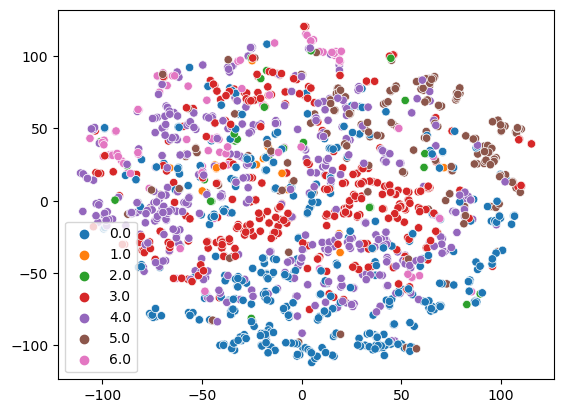

Epoch: 1 - Train Loss: 14.825550123702648


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.54s/it]


Cosine Similarity between mods: 0.3848655567902253
General - KNN F1: 0.6502167190851943 Acc: 0.6501087744742567
Iemocap - KNN F1: 0.7031495255554303 Acc: 0.6957575757575758
Meld - KNN F1: 0.5443578596140564 Acc: 0.5821299638989169
Iemocap - KNN F1 (macro): 0.5822708983576931
Meld - KNN F1 (macro): 0.42744783236278777


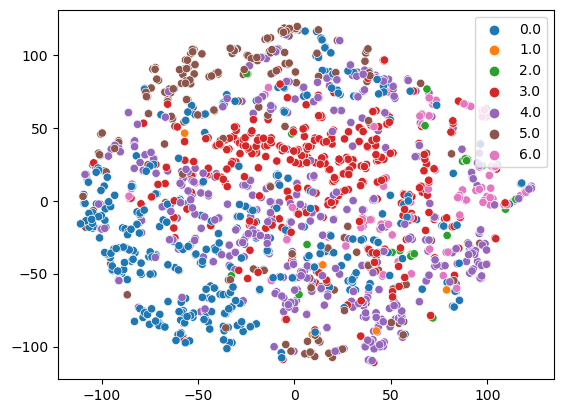

Epoch: 2 - Train Loss: 14.671791852906694


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.60s/it]


Cosine Similarity between mods: 0.3896121702131973
General - KNN F1: 0.6597587487147104 Acc: 0.6606236403190718
Iemocap - KNN F1: 0.7105970156395883 Acc: 0.7072727272727273
Meld - KNN F1: 0.557474067849247 Acc: 0.5911552346570397
Iemocap - KNN F1 (macro): 0.5928525615512751
Meld - KNN F1 (macro): 0.4341269958365795


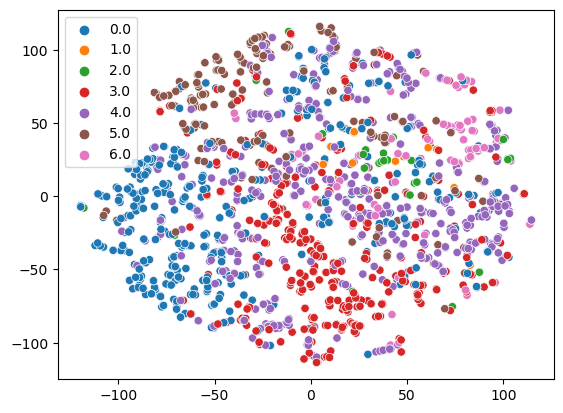

Epoch: 3 - Train Loss: 14.613643535347872


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.49s/it]


Cosine Similarity between mods: 0.38016522734644104
General - KNN F1: 0.6593271860353753 Acc: 0.6606236403190718
Iemocap - KNN F1: 0.7125093857039956 Acc: 0.7109090909090909
Meld - KNN F1: 0.5559382161864765 Acc: 0.5857400722021661
Iemocap - KNN F1 (macro): 0.5946416437507968
Meld - KNN F1 (macro): 0.42935008054990015


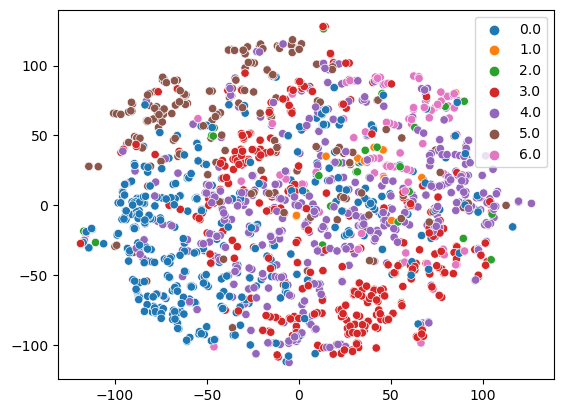

Epoch: 4 - Train Loss: 14.585349703944006


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.18s/it]


Cosine Similarity between mods: 0.3631465875903621
General - KNN F1: 0.6596569046405394 Acc: 0.6598984771573604
Iemocap - KNN F1: 0.7128443761858511 Acc: 0.7084848484848485
Meld - KNN F1: 0.5587609146942522 Acc: 0.5875451263537906
Iemocap - KNN F1 (macro): 0.5953261136729974
Meld - KNN F1 (macro): 0.4310289692063091


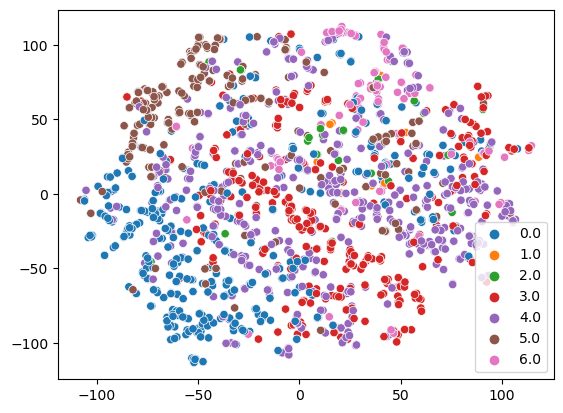

Epoch: 5 - Train Loss: 14.564400029736897


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.20s/it]


Cosine Similarity between mods: 0.35778511772128097
General - KNN F1: 0.6579270776360376 Acc: 0.659173313995649
Iemocap - KNN F1: 0.707209661748116 Acc: 0.7036363636363636
Meld - KNN F1: 0.5650849524138922 Acc: 0.5929602888086642
Iemocap - KNN F1 (macro): 0.5893526134301432
Meld - KNN F1 (macro): 0.43416759263871857


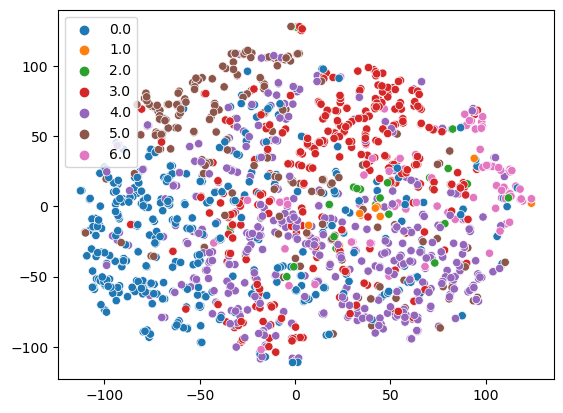

Epoch: 6 - Train Loss: 14.552709468575411


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.25s/it]


Cosine Similarity between mods: 0.358084314192785
General - KNN F1: 0.6610679322840912 Acc: 0.6624365482233503
Iemocap - KNN F1: 0.7139313072740714 Acc: 0.7127272727272728
Meld - KNN F1: 0.5612217797287017 Acc: 0.5875451263537906
Iemocap - KNN F1 (macro): 0.5994606833457984
Meld - KNN F1 (macro): 0.43494963607530607


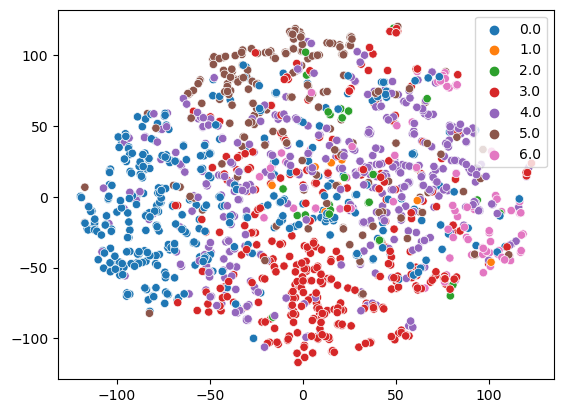

Epoch: 7 - Train Loss: 14.545458327892215


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.29s/it]


Cosine Similarity between mods: 0.35579300341699505
General - KNN F1: 0.6589189379757133 Acc: 0.6606236403190718
Iemocap - KNN F1: 0.708845445866425 Acc: 0.7066666666666667
Meld - KNN F1: 0.5676040136695096 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.5906739417352908
Meld - KNN F1 (macro): 0.4370911461987597


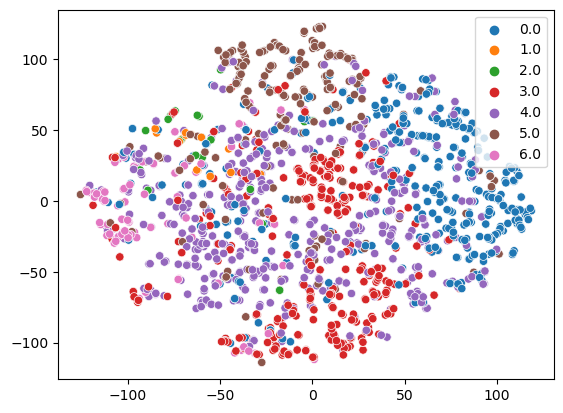

Epoch: 8 - Train Loss: 14.53681171772092


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.20s/it]


Cosine Similarity between mods: 0.3425615627407768
General - KNN F1: 0.6602687761639986 Acc: 0.6617113850616388
Iemocap - KNN F1: 0.7118285088603994 Acc: 0.7084848484848485
Meld - KNN F1: 0.5655407438913136 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.5945918232715569
Meld - KNN F1 (macro): 0.4308573230753108


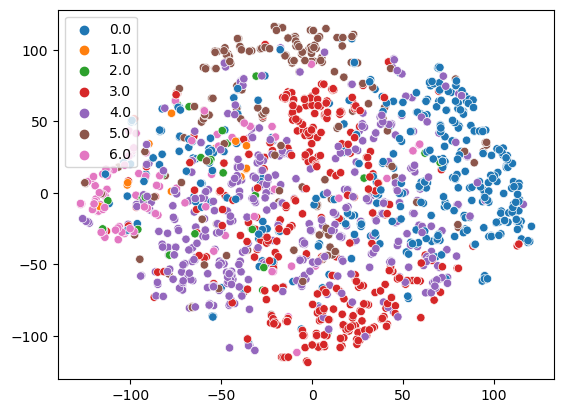

Epoch: 9 - Train Loss: 14.529729776604231


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.14s/it]


Cosine Similarity between mods: 0.33703648412979714
General - KNN F1: 0.6593946179400081 Acc: 0.6602610587382161
Iemocap - KNN F1: 0.7116595215079294 Acc: 0.7072727272727273
Meld - KNN F1: 0.564697814530707 Acc: 0.5902527075812274
Iemocap - KNN F1 (macro): 0.595281557562268
Meld - KNN F1 (macro): 0.4336818520974188


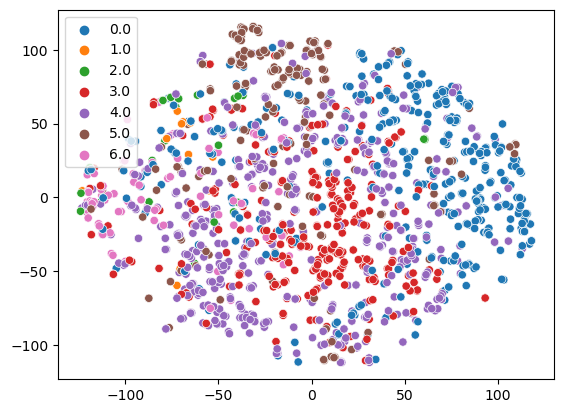

Epoch: 10 - Train Loss: 14.521602187045785


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.67s/it]


Cosine Similarity between mods: 0.33410586992669056
General - KNN F1: 0.6604018668912439 Acc: 0.6613488034807832
Iemocap - KNN F1: 0.7088609698026749 Acc: 0.7048484848484848
Meld - KNN F1: 0.5713926662252203 Acc: 0.5965703971119134
Iemocap - KNN F1 (macro): 0.5923028584236514
Meld - KNN F1 (macro): 0.45522419029447975


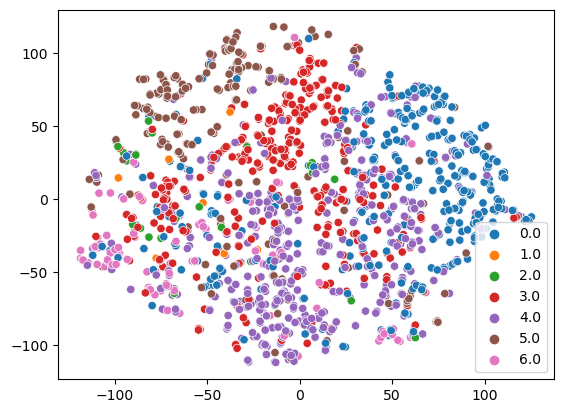

Epoch: 11 - Train Loss: 14.511797306149505


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.13s/it]


Cosine Similarity between mods: 0.3254991341882032
General - KNN F1: 0.6572134732175763 Acc: 0.6580855692530819
Iemocap - KNN F1: 0.7101148265714213 Acc: 0.7048484848484848
Meld - KNN F1: 0.5630086400485611 Acc: 0.5884476534296029
Iemocap - KNN F1 (macro): 0.5950398416801469
Meld - KNN F1 (macro): 0.43744702623400783


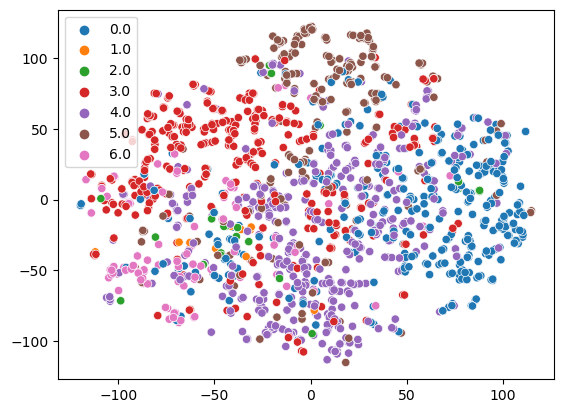

Epoch: 12 - Train Loss: 14.505741984345192


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.22s/it]


Cosine Similarity between mods: 0.3108122634057812
General - KNN F1: 0.6563693742703387 Acc: 0.6577229876722263
Iemocap - KNN F1: 0.7062226115872254 Acc: 0.7012121212121212
Meld - KNN F1: 0.5667699320387429 Acc: 0.5929602888086642
Iemocap - KNN F1 (macro): 0.5832803382869881
Meld - KNN F1 (macro): 0.4344483338214575


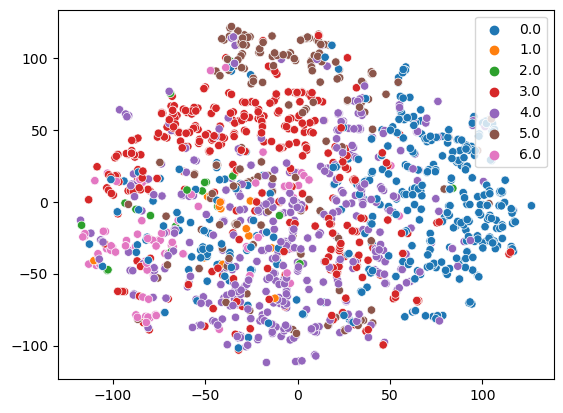

Epoch: 13 - Train Loss: 14.497102227321891


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.26s/it]


Cosine Similarity between mods: 0.29295244140846305
General - KNN F1: 0.6570615196440328 Acc: 0.6584481508339376
Iemocap - KNN F1: 0.7077334833897913 Acc: 0.703030303030303
Meld - KNN F1: 0.5683232362191908 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.5909592835870425
Meld - KNN F1 (macro): 0.43673794585339415


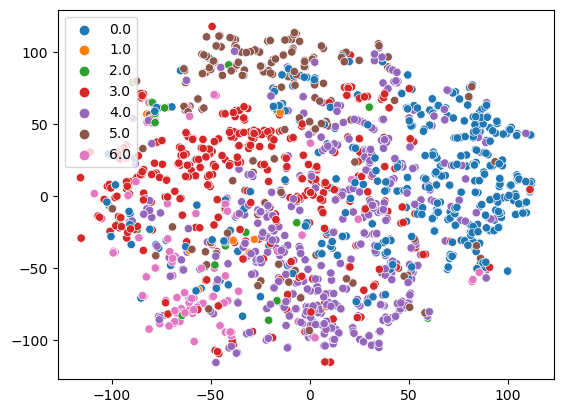

Epoch: 14 - Train Loss: 14.497193979662518


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.14s/it]


Cosine Similarity between mods: 0.28835838821333676
General - KNN F1: 0.656810433872752 Acc: 0.6580855692530819
Iemocap - KNN F1: 0.7087764962967972 Acc: 0.703030303030303
Meld - KNN F1: 0.5648797800521866 Acc: 0.5911552346570397
Iemocap - KNN F1 (macro): 0.5888982300072526
Meld - KNN F1 (macro): 0.438494872976393


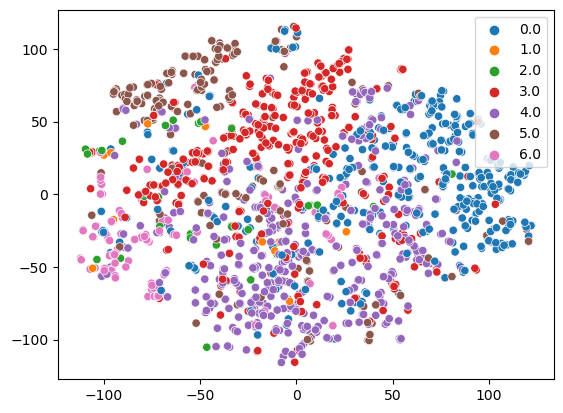

Epoch: 15 - Train Loss: 14.491127546443495


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.20s/it]


Cosine Similarity between mods: 0.27842441030478804
General - KNN F1: 0.6562422763434157 Acc: 0.6577229876722263
Iemocap - KNN F1: 0.7063208055399922 Acc: 0.7018181818181818
Meld - KNN F1: 0.568188275633218 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.5939702809871049
Meld - KNN F1 (macro): 0.43677155073106


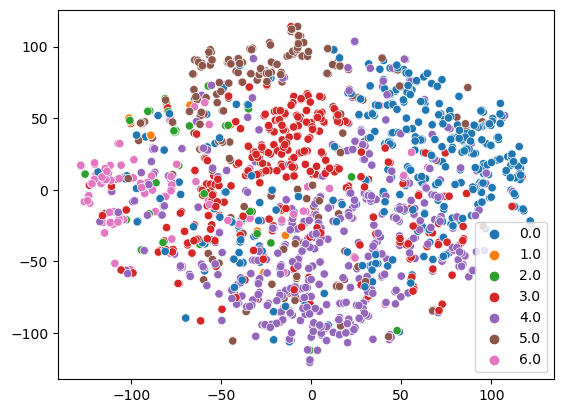

Epoch: 16 - Train Loss: 14.484935893568881


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.40s/it]


Cosine Similarity between mods: 0.2596486501714473
General - KNN F1: 0.6566908745026344 Acc: 0.6577229876722263
Iemocap - KNN F1: 0.7078794357519314 Acc: 0.7024242424242424
Meld - KNN F1: 0.5675784517004165 Acc: 0.5911552346570397
Iemocap - KNN F1 (macro): 0.5865081853309443
Meld - KNN F1 (macro): 0.4398384945210288


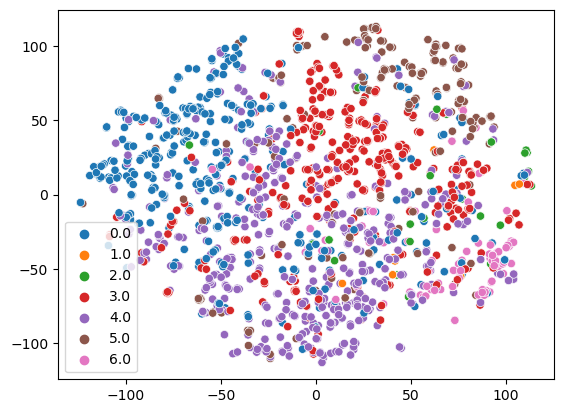

Epoch: 17 - Train Loss: 14.476251801779103


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.63s/it]


Cosine Similarity between mods: 0.22839543437335352
General - KNN F1: 0.6521623906563665 Acc: 0.6537345902828137
Iemocap - KNN F1: 0.7014190456185657 Acc: 0.6951515151515152
Meld - KNN F1: 0.5665087935194845 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.57987035393321
Meld - KNN F1 (macro): 0.441337397247692


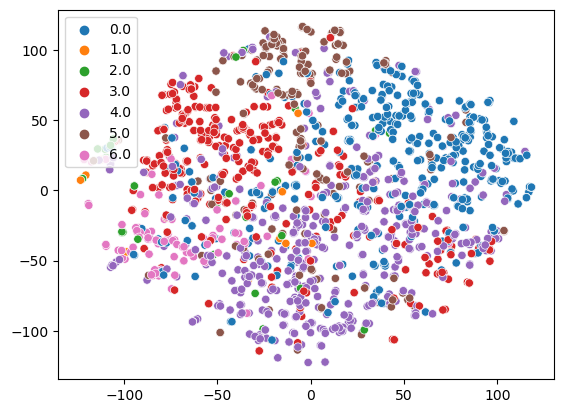

Epoch: 18 - Train Loss: 14.471630650897358


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.29s/it]


Cosine Similarity between mods: 0.22897833339367507
General - KNN F1: 0.6546745037852937 Acc: 0.6559100797679478
Iemocap - KNN F1: 0.7084973283720566 Acc: 0.7018181818181818
Meld - KNN F1: 0.5629059688067257 Acc: 0.5875451263537906
Iemocap - KNN F1 (macro): 0.5938257149875802
Meld - KNN F1 (macro): 0.43290521223779754


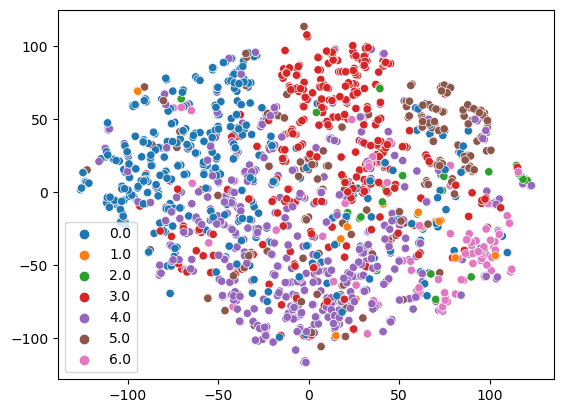

Epoch: 19 - Train Loss: 14.470392160637434


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.55s/it]


Cosine Similarity between mods: 0.18986240965114978
General - KNN F1: 0.6553706375543151 Acc: 0.6562726613488035
Iemocap - KNN F1: 0.705894994413708 Acc: 0.6993939393939393
Meld - KNN F1: 0.5676523601041463 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.5827984405865082
Meld - KNN F1 (macro): 0.43933485687009666


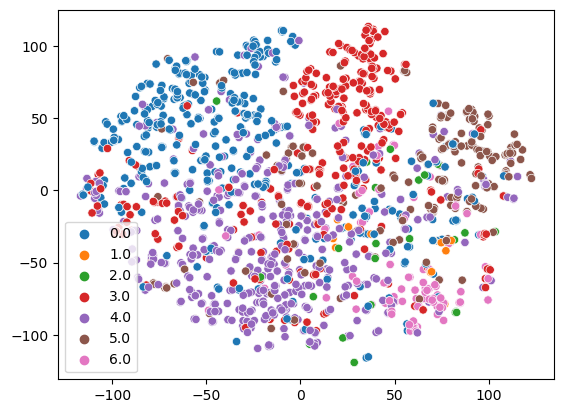

Epoch: 20 - Train Loss: 14.463206069414007


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.38s/it]


Cosine Similarity between mods: 0.1918504284809602
General - KNN F1: 0.6525875858558403 Acc: 0.654459753444525
Iemocap - KNN F1: 0.7051015753540568 Acc: 0.7006060606060606
Meld - KNN F1: 0.5628116767953276 Acc: 0.5857400722021661
Iemocap - KNN F1 (macro): 0.5888037748083975
Meld - KNN F1 (macro): 0.4360672751415766


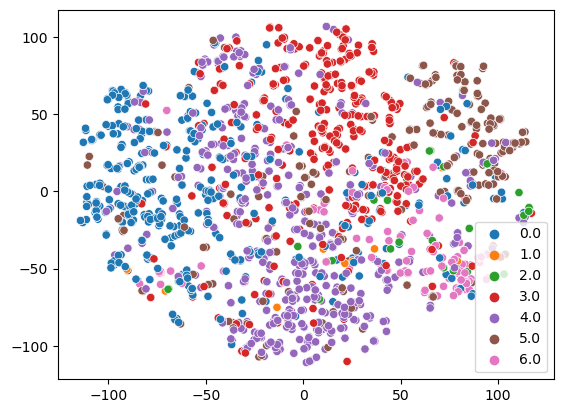

Epoch: 21 - Train Loss: 14.462869355844896


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.22s/it]


Cosine Similarity between mods: 0.19627491160524851
General - KNN F1: 0.6490954788988701 Acc: 0.6504713560551124
Iemocap - KNN F1: 0.6982683807726652 Acc: 0.6921212121212121
Meld - KNN F1: 0.5671917904761418 Acc: 0.5884476534296029
Iemocap - KNN F1 (macro): 0.5811197649637159
Meld - KNN F1 (macro): 0.4367554007716455


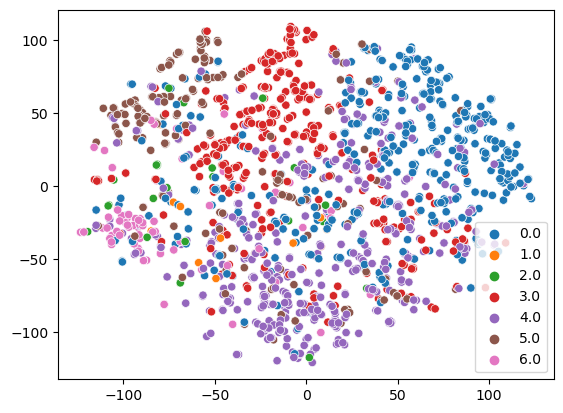

Epoch: 22 - Train Loss: 14.456636961116347


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.64s/it]


Cosine Similarity between mods: 0.19706958718192671
General - KNN F1: 0.6543371901391966 Acc: 0.6559100797679478
Iemocap - KNN F1: 0.701488895996382 Acc: 0.6963636363636364
Meld - KNN F1: 0.571495166084646 Acc: 0.5956678700361011
Iemocap - KNN F1 (macro): 0.5879708836810154
Meld - KNN F1 (macro): 0.43927273205342987


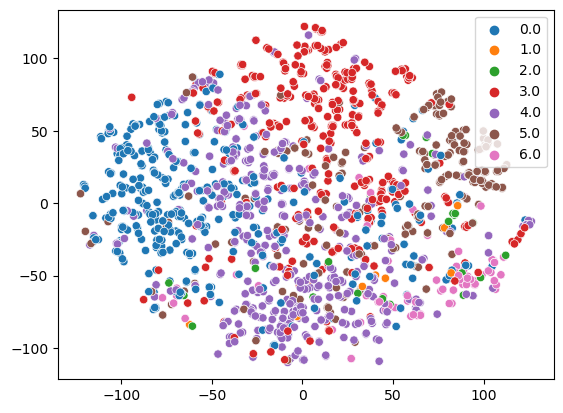

Epoch: 23 - Train Loss: 14.448110691336698


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.28s/it]


Cosine Similarity between mods: 0.1852338858667364
General - KNN F1: 0.6514356721476579 Acc: 0.6530094271211022
Iemocap - KNN F1: 0.7000330701064542 Acc: 0.6945454545454546
Meld - KNN F1: 0.5676971909581887 Acc: 0.5911552346570397
Iemocap - KNN F1 (macro): 0.589104713632507
Meld - KNN F1 (macro): 0.4393809817769553


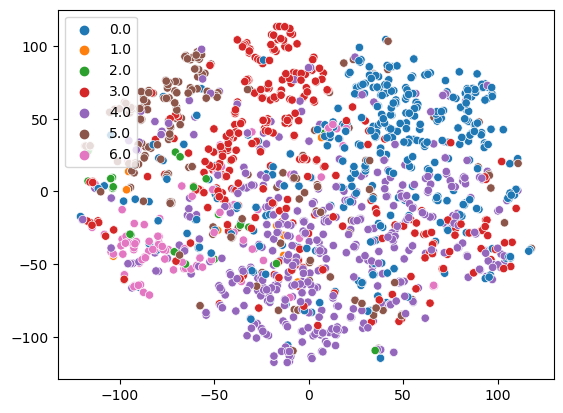

Epoch: 24 - Train Loss: 14.445337206818337


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.30s/it]


Cosine Similarity between mods: 0.1860901830505858
General - KNN F1: 0.6522410086339743 Acc: 0.6540971718636693
Iemocap - KNN F1: 0.6998205073705253 Acc: 0.6945454545454546
Meld - KNN F1: 0.5722856185669747 Acc: 0.5938628158844765
Iemocap - KNN F1 (macro): 0.5883361883756847
Meld - KNN F1 (macro): 0.4393169828355342


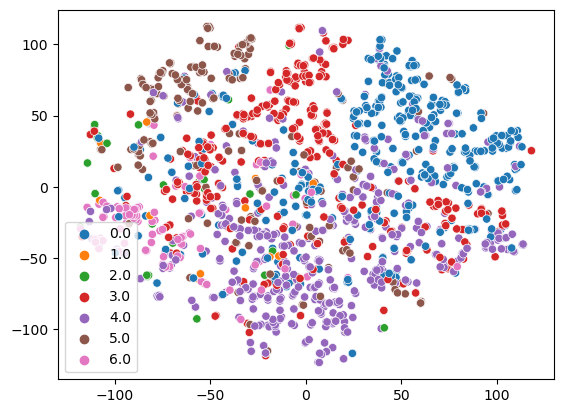

Epoch: 25 - Train Loss: 14.44176636185757


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.38s/it]


Cosine Similarity between mods: 0.17596851249290948
General - KNN F1: 0.6450687476686968 Acc: 0.6468455402465555
Iemocap - KNN F1: 0.6920660176204739 Acc: 0.686060606060606
Meld - KNN F1: 0.5659969639667671 Acc: 0.5884476534296029
Iemocap - KNN F1 (macro): 0.5804498086091426
Meld - KNN F1 (macro): 0.4401219116791842


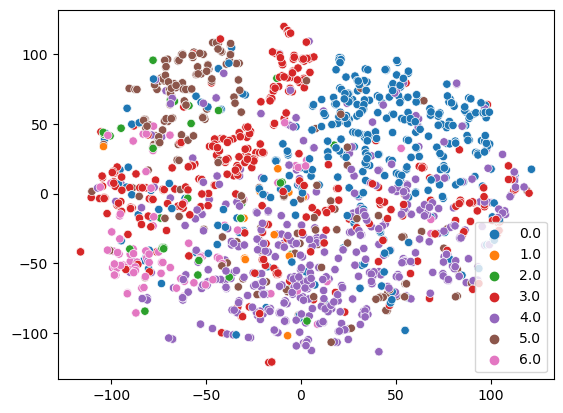

Epoch: 26 - Train Loss: 14.439578477726426


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.40s/it]


Cosine Similarity between mods: 0.18465096264148295
General - KNN F1: 0.6435296751998228 Acc: 0.6457577955039884
Iemocap - KNN F1: 0.6864898945849375 Acc: 0.6818181818181818
Meld - KNN F1: 0.5699721919531725 Acc: 0.592057761732852
Iemocap - KNN F1 (macro): 0.572510144640361
Meld - KNN F1 (macro): 0.4409162929786369


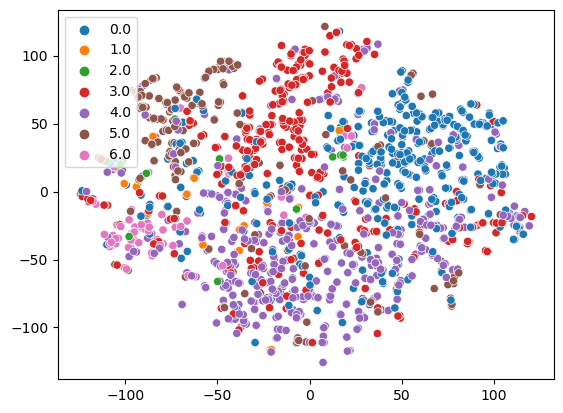

Epoch: 27 - Train Loss: 14.435926614805709


 49%|█████████████████████                      | 21/43 [02:44<02:52,  7.85s/it]


KeyboardInterrupt: 

In [43]:
dim_embed=768

PATH_TO_SAVE = 'pre_test_final_all_unfreezed_2'
!mkdir -p {PATH_TO_SAVE}

supcon_model = AudioTextCLIP(
    text_encoder,
    audio_encoder,
    in_features_text=384,
    in_features_audio=dim_embed, 
    hidden_size=2048,
    wide_proj=2048,
    proj_size=128, 
    freeze_text_enc=True,
    freeze_audio_enc=True,
)

supcon_loss = SupConLoss(temperature=0.1, contrast_mode='all', base_temperature=0.1)
supcon_loss_intra = SupConLoss(temperature=0.7, contrast_mode='all', base_temperature=0.7)

supcon_model.to(0)

#supcon_model = torch.compile(supcon_model)
scaler = torch.cuda.amp.GradScaler()

step = 0
e = 0
patience = 9999
early_stop_flag = 0
old_f1 = -float('inf')

param_optimizer = list(supcon_model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{
    'params':
    [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.1
}, {
    'params':
    [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.0
}]

opt = torch.optim.AdamW(optimizer_grouped_parameters, lr=5e-5, betas=(0.9, 0.98), eps=1e-8)
scheduler = torch.optim.lr_scheduler.LinearLR(opt, start_factor=0.5, end_factor=0.9, total_iters=10)

epochs = 9999

while e < epochs:
    supcon_model.train()
    epoch_loss = 0.0
    proj_val = []
    targets_val = []

    proj_train = []
    targets_train = []

    for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
        if i == len(train_loader)-1:
            continue
        batch = df_train.iloc[batch_indices[0]]
        
        only_text = batch[batch["path"].isna()]
        sentences = only_text["text"].tolist()
        y_text = torch.Tensor(lab_encoder.transform(only_text["label"]))
        
        only_audio = batch[batch["text"].isna()]
        audio_paths = only_audio["path"].tolist()
        y_audio = torch.Tensor(lab_encoder.transform(only_audio["label"]))
        
        mult = batch[batch["text"].notna()]
        mult = mult[mult["path"].notna()]
        y_mult = torch.Tensor(lab_encoder.transform(mult["label"]))
        multimodal = [{'sentence': str(t['text']), 'audio_path':str(t['path'])} for _, t in mult.iterrows()]
        for k, item in enumerate(multimodal):
            s = item['sentence']
            if '[CTX]' in s:
                if np.random.rand() < 0.5:
                    split = s.split('[CTX]')
                    if np.random.randint(0, 2) == 0:
                        multimodal[k] = {'sentence': split[0], 'audio_path':str(item['audio_path'])}
                    else:
                        multimodal[k] = {'sentence': split[1], 'audio_path':str(item['audio_path'])}
                        
        target = torch.cat([y_text, y_audio, y_mult])
        
        x = [sentences, audio_paths, multimodal]
        for k, val in enumerate(x):
            if len(val) == 0:
                x[k] = None

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            
            out = supcon_model(x)
            
            # Multimodal loss
            if x[-1] is not None:
                x_mult_text = out["x_mult_text"]
                x_mult_audio = out["x_mult_audio"]
                x_mult = F.normalize(x_mult_text + x_mult_audio, dim=-1)
                
                x_mult_wide = F.normalize(out["x_mult_text_wide"] + out["x_mult_audio_wide"], dim=-1)
                
                x_mult_text = x_mult_text.unsqueeze(dim=1)
                x_mult_audio = x_mult_audio.unsqueeze(dim=1)
                mult = torch.cat([x_mult_text, x_mult_audio], dim=1)
                
                if x[0] is not None:
                    if x[1] is not None:
                        out_x = torch.cat([out["x_text"], out["x_audio"], x_mult], dim=0).unsqueeze(dim=1)
                        out_x_wide = torch.cat([out["x_text_wide"], out["x_audio_wide"], x_mult_wide], dim=0)
                    else:
                        out_x = torch.cat([out["x_text"], x_mult], dim=0).unsqueeze(dim=1)
                        out_x_wide = torch.cat([out["x_text_wide"], x_mult_wide], dim=0)
                else:
                    if x[1] is not None:
                        out_x = torch.cat([out["x_audio"], x_mult], dim=0).unsqueeze(dim=1)
                        out_x_wide = torch.cat([out["x_audio_wide"], x_mult_wide], dim=0)
                        
                loss = supcon_loss(out_x, labels=target) + supcon_loss_intra(mult)
            else:
                if x[0] is not None:
                    if x[1] is not None:
                        out_x = torch.cat([out["x_text"], out["x_audio"]], dim=0).unsqueeze(dim=1)
                        out_x_wide = torch.cat([out["x_text_wide"], out["x_audio_wide"]], dim=0)
                    else:
                        out_x = out["x_text"]
                        out_x_wide = out["x_text_wide"]
                else:
                    if x[1] is not None:
                        out_x = out["x_audio"]
                        out_x_wide = out["x_audio_wide"]
                    else:
                        raise Exception("Nothing to work :()")
                        
                loss = supcon_loss(out_x, labels=target)

        scaler.scale(loss).backward()
        scaler.unscale_(opt)

        torch.nn.utils.clip_grad_norm_(supcon_model.parameters(), 20.0)
        #torch.nn.utils.clip_grad_norm_(supcon_model.text_encoder.parameters(), 0.1)
        scaler.step(opt)
        scaler.update()
        
        opt.zero_grad(set_to_none=True)

        epoch_loss += loss.item()
        proj_train.append(np.array(out_x_wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del out_x
        del out_x_wide
        gc.collect()
        torch.cuda.empty_cache()
    scheduler.step()
    proj_train = np.concatenate(proj_train, axis=0)
    targets_train = np.concatenate(targets_train, axis=0)
    
    
    clf = FaissKNeighbors(k=128)
    clf.fit(proj_train, np.array(targets_train, dtype=int))

    epoch_loss = epoch_loss/len(train_loader)
    supcon_model.eval()
    preds = []
    targets = []
    css = 0.0
    
    for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
        with torch.no_grad():
        
            multimodal_batch = test_df_erc.iloc[batch_indices[0]]
            multimodal = [{'sentence': str(t['text']), 'audio_path':str(t['path'])} for _, t in multimodal_batch.iterrows()]

            target = torch.Tensor(lab_encoder.transform(list(multimodal_batch["label"])))

            x = [None, None, multimodal]
            with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
                out = supcon_model(x)
            
            # Multimodal loss
            out_x_wide = F.normalize(out["x_mult_text_wide"] + out["x_mult_audio_wide"], dim=-1)
            
            cs = F.cosine_similarity(out["x_mult_text_wide"], out["x_mult_audio_wide"])

            wide = np.array(out_x_wide.cpu())
            pred = clf.predict(wide)
            preds.append(pred)

            assert len(wide) == len(pred)

            proj_val.append(wide)
            targets_val.append(np.array(target.cpu()))
            css += np.sum(np.array(cs.cpu()))
            del out_x_wide
            gc.collect()
            torch.cuda.empty_cache()

    proj_val = np.concatenate(proj_val, axis=0)
    targets_val = np.concatenate(targets_val, axis=0)
    
    preds = np.array(np.concatenate(preds, axis=0))
    
    css = css / len(test_df_erc)

    general_f1 = f1_score(targets_val, preds, average='weighted')
    general_acc = accuracy_score(targets_val, preds)
    
    print(f'Cosine Similarity between mods: {css}')
    
    meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
    iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index
    
    general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
    general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])
    
    general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
    general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])
    
    print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
    print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
    print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
    
    print(f"Iemocap - KNN F1 (macro): {f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='macro')}")
    print(f"Meld - KNN F1 (macro): {f1_score(targets_val[meld_idx], preds[meld_idx], average='macro')}")
    idx = np.random.randint(len(proj_val), size=2000)

    proj_val_samp = proj_val[idx, :]
    targets_val_samp = targets_val[idx]
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
    plt.show()

    print(f'Epoch: {e + 1} - Train Loss: {epoch_loss}')
    e += 1

    with open(f"{PATH_TO_SAVE}/metrics_epoch_{e}.txt", "w") as f:
        f.write(f'General - KNN F1 (weighted): {general_f1} Acc: {general_acc}')
        
    checkpoint = {"model": supcon_model.state_dict(),
              "optimizer": opt.state_dict(),
              "scaler": scaler.state_dict()}
    torch.save(checkpoint, f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_{e}.bin')

In [ ]:
proj_val.shape

In [ ]:
PATH_TO_SAVE

In [ ]:
xxx

In [ ]:
'''
Text - KNN F1: 0.6542348387913128 Acc: 0.6550580431177446
Audio - KNN F1: 0.5737952249753031 Acc: 0.5750875253362816
General - KNN F1: 0.6162479641396962 Acc: 0.6150727842270131

Epoch: 58 - Train Loss: 6.735767356136389

torch.save(checkpoint, f'./transformer_1_layer_repetindo/pytorch_model_AudioTextCLIPvFinal_epoch_{e}_only_meld.bin')
'''

## Eval

In [ ]:
#import pickle
#pickle.dump(kmeans, open("./transformer_1_layer_repetindo/kmeans_200_clusters_curr.pkl", 'wb'))

In [44]:
gc.collect()

390

In [ ]:
PATH_TO_SAVE

In [45]:
#torch.load(f'pre_test_final_2/pytorch_model_AudioTextCLIP_epoch_35.bin')['model']
torch.load(f'pre_test_final_all_unfreezed_2/pytorch_model_AudioTextCLIP_epoch_7.bin')['model']

OrderedDict([('audio_encoder.embedding.weight',
              tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
                      [ 0.0297,  0.0303,  0.0227,  ...,  0.0088, -0.0444,  0.0330],
                      [ 0.0044, -0.0127, -0.0008,  ..., -0.0243,  0.0193,  0.0089],
                      ...,
                      [-0.0428, -0.0378,  0.0011,  ...,  0.0233,  0.0078, -0.0386],
                      [ 0.0927,  0.0244, -0.0237,  ..., -0.0380,  0.0292, -0.0055],
                      [ 0.0060, -0.0321,  0.0048,  ..., -0.0513, -0.0137,  0.0214]],
                     device='cuda:0')),
             ('audio_encoder.pos_encoder.pe',
              tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],
              
                      [[0., 0., 0.,  ..., 0., 0., 0.]],
              
                      [[0., 0., 0.,  ..., 0., 0., 0.]],
              
                      ...,
              
                      [[0., 0., 0.,  ..., 0., 0., 0.]],
              
        

In [47]:
supcon_model = AudioTextCLIP(
    text_encoder,
    audio_encoder,
    in_features_text=384,
    in_features_audio=768, 
    hidden_size=2048,
    wide_proj=2048,
    proj_size=128,                   
    freeze_text_enc=True, 
    freeze_audio_enc=False,
)


supcon_model.to(0)

#supcon_model.load_state_dict(torch.load(f'pre_test_final_2/pytorch_model_AudioTextCLIP_epoch_35.bin')['model'])

supcon_model.load_state_dict(torch.load(f'pre_test_final_all_unfreezed_2/pytorch_model_AudioTextCLIP_epoch_7.bin')['model'])

<All keys matched successfully>

In [48]:
#supcon_model.load_state_dict(torch.load(f'pre_test_final_2/pytorch_model_AudioTextCLIP_epoch_35.bin')['model'])

In [49]:
supcon_model.audio_encoder.clusterization_model = pickle.load(open(f"audio_encoder_pre_trained_reformed/kmeans_128_clusters_curr.pkl", 'rb'))

In [50]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [51]:
get_n_params(supcon_model)

63902720

In [52]:
supcon_model.eval()

AudioTextCLIP(
  (audio_encoder): AudioEncoderMFCCHU(
    (embedding): Embedding(131, 768, padding_idx=0, max_norm=True)
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (transf_layer): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (linear1): Linear(in_features=768, out_features=2048, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=2048, out_features=768, bias=True)
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
    (transf_enc): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj

In [53]:
import pickle

In [54]:
test = supcon_model([["I Hate you, i believe you are shit!", "you are my best friend, love you!"],None, None])
torch.dot(F.normalize(test["x_text_wide"][0, :], dim=0), F.normalize(test["x_text_wide"][1, :], dim=0))

tensor(0.6704, device='cuda:0', grad_fn=<DotBackward0>)

In [55]:
test = supcon_model([["The best man ever, keep the good work!", "you are my best friend, love you!"],None, None])
torch.dot(F.normalize(test["x_text"][0, :], dim=0), F.normalize(test["x_text"][1, :], dim=0))

tensor(0.9680, device='cuda:0', grad_fn=<DotBackward0>)

In [56]:
test = supcon_model([["I Hate you, i believe you are shit!", "you should not be alive"],None, None])
torch.dot(F.normalize(test["x_text"][0, :], dim=0), F.normalize(test["x_text"][1, :], dim=0))

tensor(0.5555, device='cuda:0', grad_fn=<DotBackward0>)

In [57]:
with torch.no_grad():
    test = supcon_model([["you are my best friend, I love you!"],["./audio/audio_emo/tess.woman.sad.279.wav"], None])
    print(torch.dot(F.normalize(test["x_text"][0, :], dim=0), F.normalize(test["x_audio"][0, :], dim=0)))

tensor(0.5572, device='cuda:0')


/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/torch/nn/modules/transformer.py:287: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


In [58]:
with torch.no_grad():
    test = supcon_model([["I am sad because my dog died"],["./audio/audio_emo/tess.woman.sad.279.wav"], None])
    print(torch.dot(F.normalize(test["x_text"][0, :], dim=0), F.normalize(test["x_audio"][0, :], dim=0)))

tensor(0.7727, device='cuda:0')


In [59]:
with torch.no_grad():
    test = supcon_model([["you are my best friend, love you!"],["./audio/audio_emo/tess.woman.happy.50.wav"], None])
    print(torch.dot(F.normalize(test["x_text"][0, :], dim=0), F.normalize(test["x_audio"][0, :], dim=0)))

tensor(0.6139, device='cuda:0')


In [60]:
with torch.no_grad():
    test = supcon_model([None,["./audio/audio_emo/tess.woman.happy.50.wav", "./audio/audio_emo/crema.man.happy157.wav"], None])
    print(torch.dot(F.normalize(test["x_audio"][0, :], dim=0), F.normalize(test["x_audio"][1, :], dim=0)))

tensor(0.6615, device='cuda:0')


In [61]:
#supcon_model.load_state_dict(torch.load('./pytorch_model_AudioTextCLIPvFinal_epoch_25_only_meld.bin'))

In [62]:
#supcon_model.audio_encoder.clusterization_model = kmeans

In [63]:
gc.collect()

1207

In [64]:
#df_train_audio = pd.concat([df_iemocap_train[['text', 'path', 'label']], df_meld_train, train_audio.assign(text=[None for _ in range(len(train_audio))])], axis=0).reset_index(drop=True)
#df_train_audio = df_meld_train

In [65]:
#df_dev_audio = pd.concat([df_meld_dev, test_audio], axis=0)

# Param: Select dataset for scoring

In [66]:
#train_audio_repeated = pd.concat([df_train_audio, df_train_audio,df_train_audio,df_train_audio,df_train_audio,df_train_audio,df_train_audio, df_train_audio,df_train_audio,df_train_audio,df_train_audio,df_train_audio], axis=0).sample(frac=1).reset_index(drop=True)
#test_audio_repeated = pd.concat([df_dev_audio, df_dev_audio,df_dev_audio,df_dev_audio,df_dev_audio,df_dev_audio], axis=0).sample(frac=1).reset_index(drop=True)

train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(df_train)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=1024, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(test_df_erc)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=1024, shuffle=False)

In [67]:
gc.collect()

0

100%|█████████████████████████████████████████████| 3/3 [00:20<00:00,  6.96s/it]


Cosine Similarity between mods: 0.3580843211084799
General - KNN F1: 0.6559153647567668 Acc: 0.6588107324147934
Iemocap - KNN F1: 0.706940715569927 Acc: 0.7006060606060606
Meld - KNN F1: 0.5701035156644054 Acc: 0.5965703971119134
Iemocap - KNN F1 (macro): 0.5931808763613178
Meld - KNN F1 (macro): 0.43752131680819356


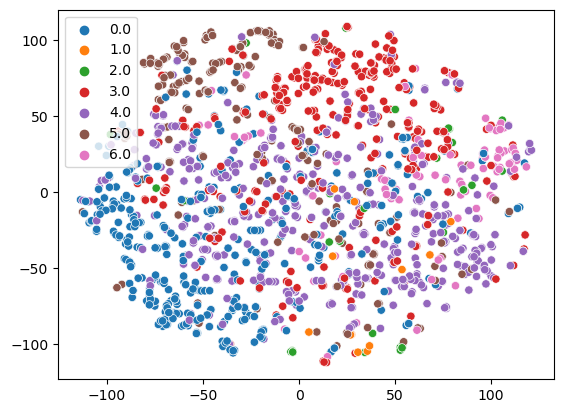

In [68]:
supcon_model.eval()
epoch_loss = 0.0
proj_val = []
targets_val = []

proj_train = []
targets_train = []

for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
    with torch.no_grad():
        batch = df_train.iloc[batch_indices[0]]

        only_text = batch[batch["path"].isna()]
        sentences = only_text["text"].tolist()
        y_text = torch.Tensor(lab_encoder.transform(only_text["label"]))

        only_audio = batch[batch["text"].isna()]
        audio_paths = only_audio["path"].tolist()
        y_audio = torch.Tensor(lab_encoder.transform(only_audio["label"]))

        mult = batch[batch["text"].notna()]
        mult = mult[mult["path"].notna()]
        y_mult = torch.Tensor(lab_encoder.transform(mult["label"]))
        multimodal = [{'sentence': str(t['text']), 'audio_path':str(t['path'])} for _, t in mult.iterrows()]

        target = torch.cat([y_text, y_audio, y_mult])

        x = [sentences, audio_paths, multimodal]
        for k, val in enumerate(x):
            if len(val) == 0:
                x[k] = None

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:

            out = supcon_model(x)

            # Multimodal loss
            if x[-1] is not None:
                x_mult_text = out["x_mult_text"]
                x_mult_audio = out["x_mult_audio"]
                x_mult = F.normalize(x_mult_text + x_mult_audio, dim=-1)

                x_mult_wide = F.normalize(out["x_mult_text_wide"] + out["x_mult_audio_wide"], dim=-1)

                x_mult_text = x_mult_text.unsqueeze(dim=1)
                x_mult_audio = x_mult_audio.unsqueeze(dim=1)
                mult = torch.cat([x_mult_text, x_mult_audio], dim=1)

                if x[0] is not None:
                    if x[1] is not None:
                        out_x_wide = torch.cat([out["x_text_wide"], out["x_audio_wide"], x_mult_wide], dim=0)
                    else:
                        out_x_wide = torch.cat([out["x_text_wide"], x_mult_wide], dim=0)
                else:
                    if x[1] is not None:
                        out_x_wide = torch.cat([out["x_audio_wide"], x_mult_wide], dim=0)

            else:
                if x[0] is not None:
                    if x[1] is not None:
                        out_x_wide = torch.cat([out["x_text_wide"], out["x_audio_wide"]], dim=0)
                    else:
                        out_x_wide = out["x_text_wide"]
                else:
                    if x[1] is not None:
                        out_x_wide = out["x_audio_wide"]
                    else:
                        raise Exception("Nothing to work :()")

        epoch_loss += loss.item()
        proj_train.append(np.array(out_x_wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del out_x_wide
        gc.collect()
        torch.cuda.empty_cache()
        
proj_train = np.concatenate(proj_train, axis=0)
targets_train = np.concatenate(targets_train, axis=0)

clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))

epoch_loss = epoch_loss/len(train_loader)
supcon_model.eval()
preds = []
targets = []
css = 0.0

for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
    with torch.no_grad():

        multimodal_batch = test_df_erc.iloc[batch_indices[0]]
        multimodal = [{'sentence': str(t['text']), 'audio_path':str(t['path'])} for _, t in multimodal_batch.iterrows()]

        target = torch.Tensor(lab_encoder.transform(list(multimodal_batch["label"])))

        x = [None, None, multimodal]
        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            out = supcon_model(x)

        # Multimodal loss
        out_x_wide = F.normalize(out["x_mult_text_wide"] + out["x_mult_audio_wide"], dim=-1)

        cs = F.cosine_similarity(out["x_mult_text_wide"], out["x_mult_audio_wide"])

        wide = np.array(out_x_wide.cpu())
        pred = clf.predict(wide)
        preds.append(pred)

        assert len(wide) == len(pred)

        proj_val.append(wide)
        targets_val.append(np.array(target.cpu()))
        css += np.sum(np.array(cs.cpu()))
        del out_x_wide
        gc.collect()
        torch.cuda.empty_cache()

proj_val = np.concatenate(proj_val, axis=0)
targets_val = np.concatenate(targets_val, axis=0)

preds = np.array(np.concatenate(preds, axis=0))

css = css / len(test_df_erc)

general_f1 = f1_score(targets_val, preds, average='weighted')
general_acc = accuracy_score(targets_val, preds)

print(f'Cosine Similarity between mods: {css}')

meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index

general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])

general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])

print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')

print(f"Iemocap - KNN F1 (macro): {f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='macro')}")
print(f"Meld - KNN F1 (macro): {f1_score(targets_val[meld_idx], preds[meld_idx], average='macro')}")
idx = np.random.randint(len(proj_val), size=2000)

proj_val_samp = proj_val[idx, :]
targets_val_samp = targets_val[idx]
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
plt.show()

In [82]:
clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
mean_test = proj_train.mean(axis=0)
std_test = proj_train.std(axis=0)
clf = LogisticRegression()
clf.fit(proj_train, targets_train)

/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
proj_train

array([[ 0.00313911, -0.02365419, -0.03180588, ...,  0.02498421,
         0.00065651,  0.0438475 ],
       [-0.00627988, -0.03019445, -0.03538279, ...,  0.02560149,
        -0.00331182,  0.02948566],
       [-0.01088451, -0.03858062, -0.00978001, ...,  0.04027591,
         0.01458974, -0.00261678],
       ...,
       [-0.00801703, -0.01709794, -0.03336934, ...,  0.02155652,
         0.01203034,  0.03224252],
       [-0.00249975, -0.00016823, -0.00427317, ...,  0.01992301,
         0.02335542, -0.00466765],
       [-0.00322207, -0.02638153, -0.01646819, ...,  0.02266119,
         0.01619245,  0.02688153]], dtype=float32)

In [72]:
proj_val.shape

(2758, 2048)

In [83]:
preds = clf.predict(proj_val)

In [84]:
general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])

general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])

In [85]:
general_f1_iemocap

0.706940715569927

In [86]:
general_f1_meld

0.5701035156644054

In [87]:
from sklearn.metrics import classification_report

print(classification_report(targets_val[meld_idx], preds[meld_idx]))

              precision    recall  f1-score   support

         0.0       0.51      0.30      0.38       153
         1.0       0.40      0.18      0.25        22
         2.0       0.38      0.12      0.19        40
         3.0       0.52      0.54      0.53       163
         4.0       0.64      0.85      0.73       469
         5.0       0.57      0.32      0.41       111
         6.0       0.60      0.56      0.58       150

    accuracy                           0.60      1108
   macro avg       0.52      0.41      0.44      1108
weighted avg       0.58      0.60      0.57      1108



In [88]:
from sklearn.metrics import classification_report

print(classification_report(targets_val[iemocap_idx], preds[iemocap_idx]))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       551
         2.0       0.25      0.20      0.22        10
         3.0       0.89      0.66      0.76       442
         4.0       0.51      0.66      0.57       384
         5.0       0.75      0.68      0.71       245
         6.0       0.43      0.67      0.52        18

    accuracy                           0.70      1650
   macro avg       0.60      0.61      0.59      1650
weighted avg       0.73      0.70      0.71      1650

